# __Decision Tree Classification Demo__
### Analyzing the Impact of __Healthcare Access__ and __Maternal Practices__ on __Immediate Postnatal Care__ Across Districts in India using the __NFHS Dataset__

### Key Indicators Influencing Postnatal Care

1. **Births Attended by Skilled Health Personnel (in the 5 years before the survey) (%)** 
   - This feature can indicate the percentage of births overseen by qualified medical staff, reflecting the quality and accessibility of maternal healthcare services which can directly impact postnatal outcomes.

2. **Mothers Who Consumed Iron Folic Acid for 100 Days or More When They Were Pregnant (for last birth in the 5 years before the survey) (%)**
   - This feature would measure the proportion of mothers adhering to recommended prenatal nutritional supplementation, crucial for preventing maternal anemia and promoting healthy pregnancy outcomes.

3. **Mothers Who Had at Least 4 Antenatal Care Visits (for last birth in the 5 years before the survey) (%)**
   - This can track the percentage of mothers receiving the minimum recommended number of antenatal check-ups, essential for monitoring pregnancy health and preparing for safe childbirth.

4. **Population Living in Households with Electricity (%)**
   - This would serve as an indicator of socioeconomic status, which is linked to better access to information and healthcare resources, potentially improving postnatal care utilization.

5. **Mothers Who Received Postnatal Care from a Doctor/Nurse/LHV/ANM/Midwife/Other Health Personnel Within 2 Days of Delivery (for last birth in the 5 years before the survey) (%)**
   - This would reflect immediate postnatal care engagement, critical for early detection and management of complications in both mothers and newborns, thereby enhancing survival and health outcomes.


Flowchart for Decision Tree Classifier


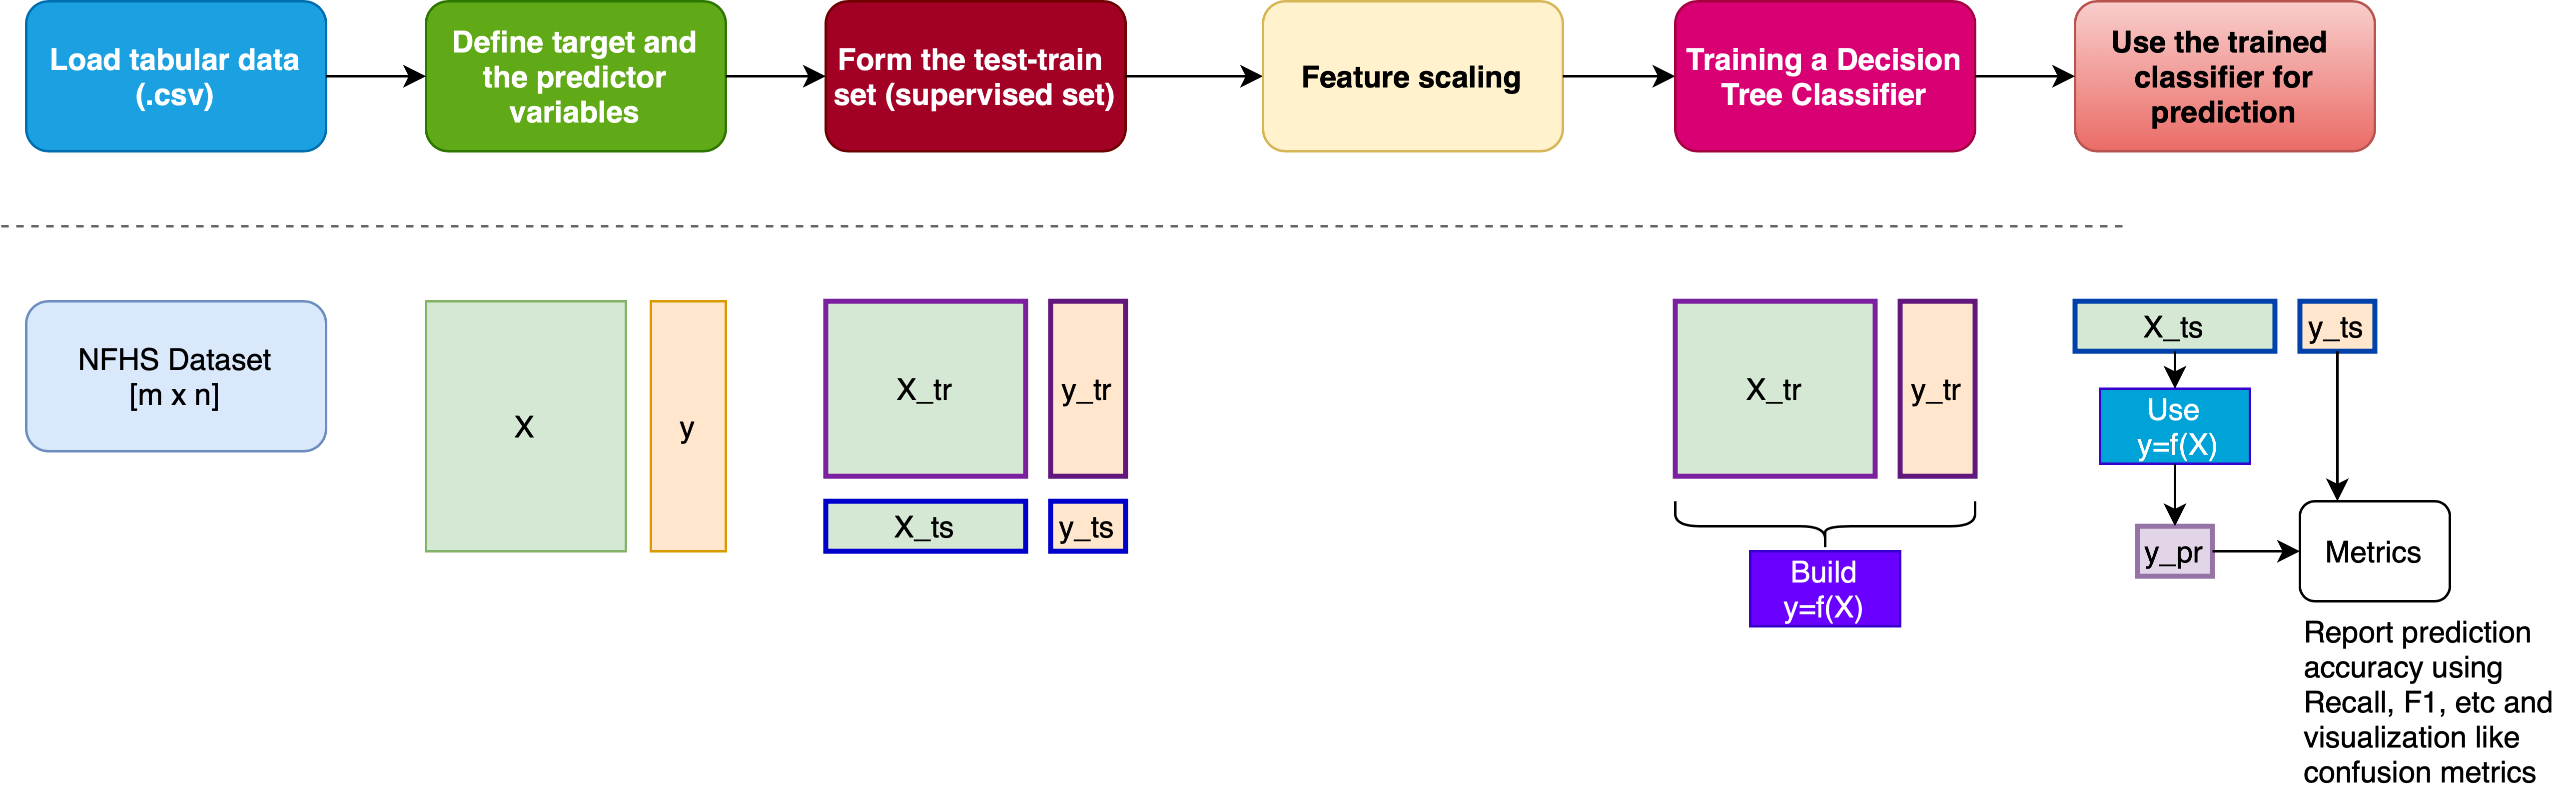

In [3]:
from IPython.display import Image
print("Flowchart for Decision Tree Classifier")
Image(filename='../img/flowchart DT.drawio-2.png')  # for local images

### Import relevant libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



### Load NFHS Data

In [6]:
# Load data
data_all = pd.read_csv('../data/NFHS_5_India_Districts_Level.csv') # Load data from a CSV file into a pandas Dataframe.

# Define the columns to extract
columns_to_extract = [
    'District Names',  # the column for districts
    'State/UT',        # the column for states
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Population living in households with electricity (%)',
    'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)'
]
# Create a new DataFrame with only the selected columns
new_data = data_all[columns_to_extract]

In [7]:
new_data

,District Names,State/UT,Births attended by skilled health personnel (in the 5 years before the survey)10 (%),Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%),Mothers who had at least 4 antenatal care visits (for last birth in the 5 years before the survey) (%),Population living in households with electricity (%),Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)
0,Nicobars,Andaman & Nicobar Islands,98.6,72.6,71.7,97.9,85.1
1,North & Middle Andaman,Andaman & Nicobar Islands,98.3,83.7,79.2,93.2,92.5
2,South Andaman,Andaman & Nicobar Islands,96.9,81.0,85.9,99.6,88.1
3,Srikakulam,Andhra Pradesh,96.4,67.5,78.4,99.9,90.8
4,Vizianagaram,Andhra Pradesh,97.6,59.6,71.4,99.5,83.9
...,...,...,...,...,...,...,...
702,South Twenty Four Pargana,West Bengal,93.2,67.2,87.5,99.2,67.0
703,Paschim Medinipur,West Bengal,95.1,64.3,63.1,95.4,79.7
704,Purba Medinipur,West Bengal,94.6,51.6,56.8,99.0,48.5
705,Paschim Barddhaman,West Bengal,91.3,57.0,70.4,97.0,64.1


### Convert a continuous column to categorical for classification

In [8]:
# Convert the continuous column into categorical by using pd.qcut() function
new_data['Received postnatal care'] = pd.qcut(
    new_data['Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)'],
    q=3, 
    labels=["Low", "Medium", "High"]
)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_3940\1675264225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Received postnatal care'] = pd.qcut(


In [9]:
new_data

,District Names,State/UT,Births attended by skilled health personnel (in the 5 years before the survey)10 (%),Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%),Mothers who had at least 4 antenatal care visits (for last birth in the 5 years before the survey) (%),Population living in households with electricity (%),Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%),Received postnatal care
0,Nicobars,Andaman & Nicobar Islands,98.6,72.6,71.7,97.9,85.1,Medium
1,North & Middle Andaman,Andaman & Nicobar Islands,98.3,83.7,79.2,93.2,92.5,High
2,South Andaman,Andaman & Nicobar Islands,96.9,81.0,85.9,99.6,88.1,High
3,Srikakulam,Andhra Pradesh,96.4,67.5,78.4,99.9,90.8,High
4,Vizianagaram,Andhra Pradesh,97.6,59.6,71.4,99.5,83.9,Medium
...,...,...,...,...,...,...,...,...
702,South Twenty Four Pargana,West Bengal,93.2,67.2,87.5,99.2,67.0,Low
703,Paschim Medinipur,West Bengal,95.1,64.3,63.1,95.4,79.7,Medium
704,Purba Medinipur,West Bengal,94.6,51.6,56.8,99.0,48.5,Low
705,Paschim Barddhaman,West Bengal,91.3,57.0,70.4,97.0,64.1,Low


### Feature selection and encoding and scaling

In [10]:
# Select a few predictive features based on domain knowledge and initial analysis
features = [
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Population living in households with electricity (%)'
]

# Predictor variables
X = new_data[features] 

# Target variable
y = new_data['Received postnatal care']

# Splitting the dataset into the Training set and Test set for supervised training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
# Feature scaling
scaler = StandardScaler()  # subtracting the mean and then dividing by std
X_train = scaler.fit_transform(X_train)  # scikit always provides you with a fit operation 
X_test = scaler.transform(X_test)

### Model training and prediction

In [12]:
# Model Building - Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=2,
                                    random_state=42)
classifier.fit(X_train, y_train)  

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Model Evaluation

[[43  0 15]
 [ 4 28 25]
 [17  7 38]]
              precision    recall  f1-score   support

        High       0.67      0.74      0.70        58
         Low       0.80      0.49      0.61        57
      Medium       0.49      0.61      0.54        62

    accuracy                           0.62       177
   macro avg       0.65      0.62      0.62       177
weighted avg       0.65      0.62      0.62       177



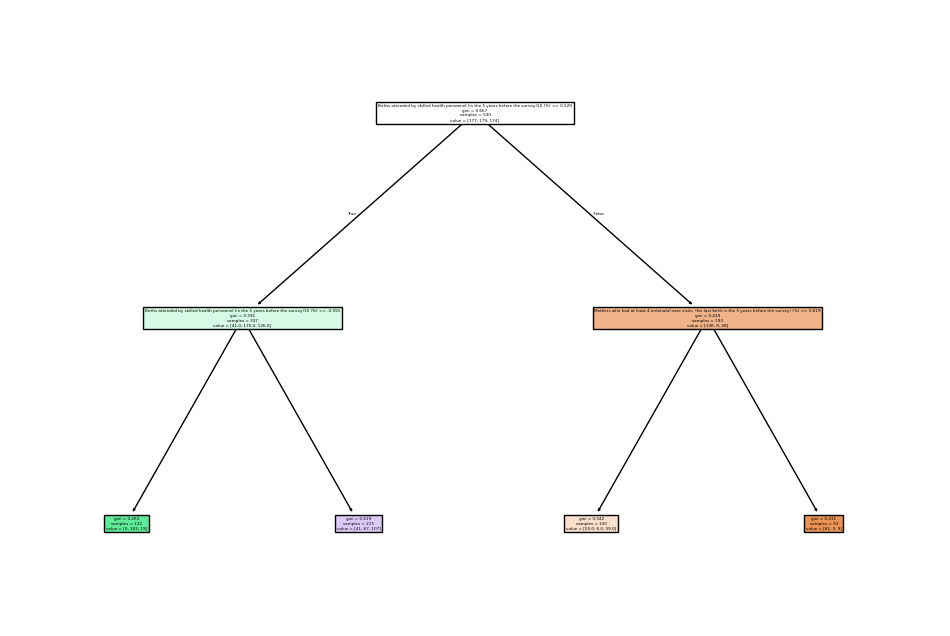

In [14]:

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print(classification_report(y_test, y_pred))

# Visualizing the tree
plt.figure(figsize=(12,8))
plot_tree(classifier, filled=True, feature_names=features)
plt.show()

The above is tree is difficult to visualize - can you guess why?
- The feature names are too long
- The depth of the tree formation is high

Solution - Make feature names short.

### Forming short feature names

In [15]:
old_columns = [
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)',
    'Population living in households with electricity (%)',
    'Received postnatal care'
]

new_columns = [
    'Supported by personnel',
    'Folic acid consumed',
    'Antenatal visits',
    'Electrified household',
    'Received postnatal care'
]

# Create a dictionary for renaming
rename_dict = {old: new for old, new in zip(old_columns, new_columns)}

# Create the new DataFrame with selected columns and new names
data_colnew = new_data[old_columns].rename(columns=rename_dict)

# Display the new DataFrame
print(data_colnew.head())

   Supported by personnel  Folic acid consumed  Antenatal visits  \
0                    98.6                 72.6              71.7   
1                    98.3                 83.7              79.2   
2                    96.9                 81.0              85.9   
3                    96.4                 67.5              78.4   
4                    97.6                 59.6              71.4   

   Electrified household Received postnatal care  
0                   97.9                  Medium  
1                   93.2                    High  
2                   99.6                    High  
3                   99.9                    High  
4                   99.5                  Medium  


In [16]:
# Target and predictor varibales 
features_colnew = [
    'Supported by personnel',
    'Folic acid consumed',
    'Antenatal visits',
    'Electrified household',
]

X = data_colnew[features_colnew]  # Predictors
y = data_colnew['Received postnatal care']  # Target

              precision    recall  f1-score   support

        High       0.67      0.74      0.70        58
         Low       0.80      0.49      0.61        57
      Medium       0.49      0.61      0.54        62

    accuracy                           0.62       177
   macro avg       0.65      0.62      0.62       177
weighted avg       0.65      0.62      0.62       177



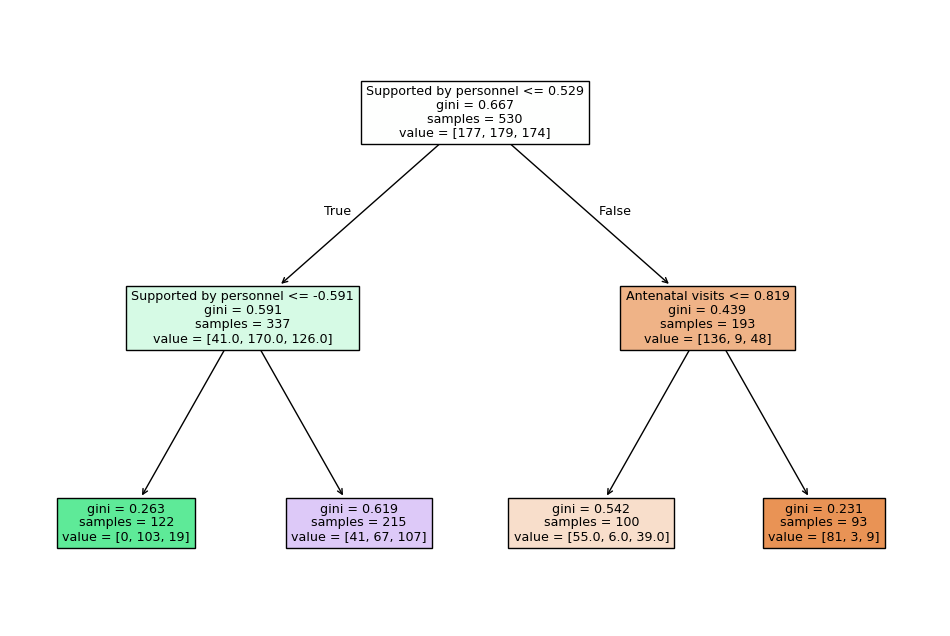

array([0.66822223, 0.60522607, 0.74128407, 0.1367035 ])

In [17]:
# Data Preprocessing
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building
# Fitting Decision Tree Classification to the Training set
classifier_ = DecisionTreeClassifier(criterion='gini',
                                    max_depth=2,
                                    random_state=0)
classifier_.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Visualizing the tree
plt.figure(figsize=(12,8))
plot_tree(classifier_, filled=True, feature_names=features_colnew)
plt.show()



X_test[0]

[[43  0 15]
 [ 4 28 25]
 [17  7 38]]


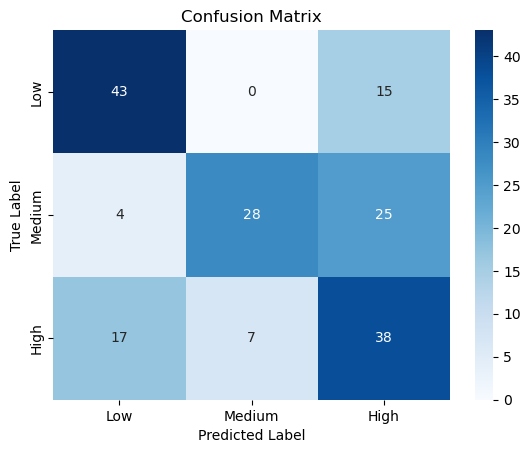

In [18]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, 
            fmt="d", cmap="Blues", 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])

# Set the title of the heatmap visualization.
plt.title('Confusion Matrix')  # Title for the heatmap

# Label the x-axis and y-axis with appropriate descriptions.
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis

# Display the plot.
plt.show()  # Show the heatmap visualization of the confusion matrix

### Extra: Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '../data/NFHS_5_India_Districts_Level.csv'
data = pd.read_csv(file_path)

# Define relevant variables for EDA
variables = [
    'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
    'Institutional births in public facility (in the 5 years before the survey) (%)',
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Population living in households with electricity (%)',
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%)',
    'Women age 20-24 years married before age 18 years (%)',
    'Number of Women age 15-49 years interviewed'  # Example of demographic data
]

# Create a smaller dataframe with selected variables
selected_data = data[variables]

# Fill missing values with mean for continuous data
selected_data = selected_data.fillna(selected_data.mean())

# # Pairplot to visualize distributions and relationships
# sns.pairplot(selected_data)
# plt.suptitle('Pairplot of Selected Variables', size=16)
# plt.show()

# Heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'NFHS_5_India_Districts_Level.csv'

## Pearson Correlation Coefficient Formula

The correlation coefficient, often denoted as $r$, measures the strength and direction of a linear relationship between two variables. The formula for the Pearson correlation coefficient is:

\begin{equation}
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
\end{equation}

Where:
- $x_i$ and $y_i$ are the individual values of the variables $X$ and $Y$,
- $\bar{x}$ and $\bar{y}$ are the means of variables $X$ and $Y$ respectively,
- The numerator $\sum (x_i - \bar{x})(y_i - \bar{y})$ is the sum of the product of the deviations of each pair of observations from their respective means,
- The denominator is the product of the square roots of the sum of the squares of the deviations of each variable from its mean.

This correlation coefficient $r$ ranges between -1 and 1:
- $1$ indicates a perfect positive linear relationship,
- $-1$ indicates a perfect negative linear relationship,
- $0$ indicates no linear relationship.


## Decision Tree Feature Selection Demonstration with Varied Thresholds (Classification)

To showcase the importance of feature selection in decision trees, we explore how different thresholds for "Skilled Birth Attendance (%)" and "Antenatal Visits (%)" affect the classification accuracy and purity of the splits.

### Dataset Overview

Given the dataset:

| Skilled Birth Attendance (%) | Antenatal Visits (%) | Class   |
|------------------------------|----------------------|---------|
| 85                           | 95                   | High    |
| 75                           | 80                   | Medium  |
| 60                           | 70                   | Medium  |
| 45                           | 50                   | Low     |
| 30                           | 40                   | Low     |

### Defining Groups Based on Different Thresholds

- **Skilled Birth Attendance ≤ 45%**
- **Antenatal Visits ≤ 70%**

### Gini Impurity Calculations for Each Group

#### Skilled Birth Attendance

**Group 1 (≤ 45%):**
- Consists of 2 Low
\begin{equation}
Gini(Group 1) = 1 - \left( \left(\frac{2}{2}\right)^2 + \left(\frac{0}{2}\right)^2 + \left(\frac{0}{2}\right)^2 \right) = 0
\end{equation}

**Group 2 (> 45%):**
- Consists of 2 Medium, 1 High
\begin{equation}
Gini(Group 2) = 1 - \left( \left(\frac{0}{3}\right)^2 + \left(\frac{2}{3}\right)^2 + \left(\frac{1}{3}\right)^2 \right) = 0.4445
\end{equation}

#### Antenatal Visits

**Group 1 (≤ 70%):**
- Consists of 2 Low, 1 Medium
\begin{equation}
Gini(Group 1) = 1 - \left( \left(\frac{2}{3}\right)^2 + \left(\frac{1}{3}\right)^2 + \left(\frac{0}{3}\right)^2 \right) = 0.4445
\end{equation}

**Group 2 (> 70%):**
- Consists of 1 Medium, 1 High
\begin{equation}
Gini(Group 2) = 1 - \left( \left(\frac{0}{2}\right)^2 + \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right) = 0.5
\end{equation}

### Weighted Gini Impurity for the Splits

#### Skilled Birth Attendance

\begin{equation}
Gini_{split\_Skilled} = \left( \frac{2}{5} \times 0\right) + \left(\frac{3}{5} \times 0.4445 \right) = 0.2667
\end{equation}

#### Antenatal Visits

\begin{equation}
Gini_{split\_Antenatal} = \left( \frac{3}{5} \times 0.4445\right) + \left(\frac{2}{5} \times 0.5 \right) = 0.4667
\end{equation}

### Conclusion

The analysis reveals that setting thresholds at **45 for Skilled Birth Attendance** and **70% for Antenatal Visits** produces significantly different Gini impurities, demonstrating that the choice of feature and threshold can drastically influence the effectiveness of the decision tree's splits. The lower Gini impurity for Skilled Birth Attendance suggests it might be a more effective predictor at this specific threshold.


## Decision Tree Threshold Selection (Regression)

Given a dataset with a predictor variable `X` and a target variable `y`, we aim to find the best threshold for splitting `X` to minimize the impurity in resulting nodes using Mean Squared Error (MSE).

| X (Predictor) | y (Target) |
|---------------|------------|
| 2             | 4          |
| 3             | 6          |
| 4             | 5          |
| 6             | 7          |
| 7             | 8          |

## Objective

The goal is to determine the optimal threshold for splitting the predictor variable `X` that minimizes the impurity measured by MSE in the resulting subsets of data.

## Steps for Calculation

### 1. Sort Data by Predictor
Arrange the data points by the value of the predictor variable `X`.

### 2. Calculate Possible Split Points
Identify potential split points which are the midpoints between each distinct value of `X`:
- Split points: 2.5, 3.5, 5, and 6.5

### 3. Compute MSE for Each Split
Evaluate each split by calculating the MSE for left and right nodes and their weighted average to assess the quality of the split.

## Detailed Calculation at Split Point `X = 5`

### Left Node (X ≤ 5)
Data points where `X` is less than or equal to 5:
- `y` values: [4, 6, 5]
- Mean (`μ_left`) = (4 + 6 + 5) / 3 = 5
- MSE Left = [(4 - 5)² + (6 - 5)² + (5 - 5)²] / 3 = [1 + 1 + 0] / 3 = 0.67

### Right Node (X > 5)
Data points where `X` is greater than 5:
- `y` values: [7, 8]
- Mean (`μ_right`) = (7 + 8) / 2 = 7.5
- MSE Right = [(7 - 7.5)² + (8 - 7.5)²] / 2 = [0.25 + 0.25] / 2 = 0.25

### Weighted Average of MSEs
- Total number of data points = 5
- Proportions: Left Node = 3/5, Right Node = 2/5
- Weighted MSE = (3/5 * 0.67) + (2/5 * 0.25) = 0.402 + 0.1 = 0.502

## Selecting the Best Split
The best split minimizes the weighted average MSE across the resulting nodes. Repeat the above calculation for each potential split point and select the one with the lowest weighted MSE.

## Conclusion
This recursive process is used in decision trees to refine the model’s predictions by progressively reducing impurity at each node, optimizing the decision tree for better predictive accuracy.
